In [1]:
%load_ext autoreload
%autoreload 2

#%% Change working directory from the workspace root to the ipynb file location. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
    os.chdir(r'C:\Users\kevin\Documents\Workspace\psylit-experiments')
    print("Changed cwd:", os.getcwd())
except:
    print("cwd:", os.getcwd())

from collections import *
from statistics import mean
from functools import *
from os import linesep as EOL
from itertools import *
import re

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
plt.rcParams['figure.figsize'] = 16,10
np.random.seed(0)


Changed cwd: C:\Users\kevin\Documents\Workspace\psylit-experiments


In [84]:
#[f for f in os.listdir(r'..\datasets\characters') if f.startswith('EN_')]
df = pd.read_csv(r'..\datasets\character_fixed.csv', sep=";", na_values="#NULL!", decimal=',')
cols = ['AE','AA','AC','AS','AO']#,'CHRSEX','VALENCE','SALIENCE']
newcols = ['Ext', 'Agr', 'Con', 'Stb', 'Opn']
df.rename(dict(zip(cols, newcols)), axis='columns', inplace=True)
cols = newcols
del newcols
charnames = df.CHRNAME.to_numpy()
df[cols].fillna(0)
df.describe()

,CHRNUM,CHRSEX,VALENCE,SALIENCE,Ext,Agr,Con,Stb,Opn
count,435.000000,435.000000,382.000000,382.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,278.625287,1.432184,1.217277,1.494764,4.337655,4.243885,4.906805,4.063839,4.476322
std,167.912062,0.495950,0.412934,0.500628,1.779690,1.917222,1.745818,1.594860,1.645430
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,134.000000,1.000000,1.000000,1.000000,3.000000,2.500000,3.500000,2.770000,3.250000
50%,268.000000,1.000000,1.000000,1.000000,4.500000,4.500000,5.250000,4.000000,4.670000
75%,434.500000,2.000000,1.000000,2.000000,5.915000,6.000000,6.500000,5.465000,5.895000
max,582.000000,2.000000,2.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [32]:
def cosines(vecs, return_type=np.zeros):
    vecs = list(vecs)
    n = len(vecs)
    c = return_type([n,n])
    norm = np.linalg.norm # for PyTorch: torch.norm
    # TODO compute all norms at once
    for i in range(n):
        vi = vecs[i]
        vi2 = norm(vi)
        for j in range(i, n):
            vj = vecs[j]
            vj2 = norm(vj)
            c[j, i] = c[i, j] = 1 - (vi @ vj) / (vi2 * vj2)  #cosine(vecs[i], vecs[j])
    return c

def similarities(vecs, beta=0.1):
    D = cosines(vecs)
    return np.exp(-beta * D / D.std())

In [34]:
X = df[cols].to_numpy()
S = similarities(X)
S

array([[1.        , 0.93899383, 0.95701543, ..., 0.84791892, 0.98535833,
        0.94733271],
       [0.93899383, 1.        , 0.96944858, ..., 0.70469261, 0.96451348,
        0.92859905],
       [0.95701543, 0.96944858, 1.        , ..., 0.80674238, 0.95979289,
        0.98035065],
       ...,
       [0.84791892, 0.70469261, 0.80674238, ..., 1.        , 0.78163945,
        0.85452517],
       [0.98535833, 0.96451348, 0.95979289, ..., 0.78163945, 1.        ,
        0.95089439],
       [0.94733271, 0.92859905, 0.98035065, ..., 0.85452517, 0.95089439,
        1.        ]])

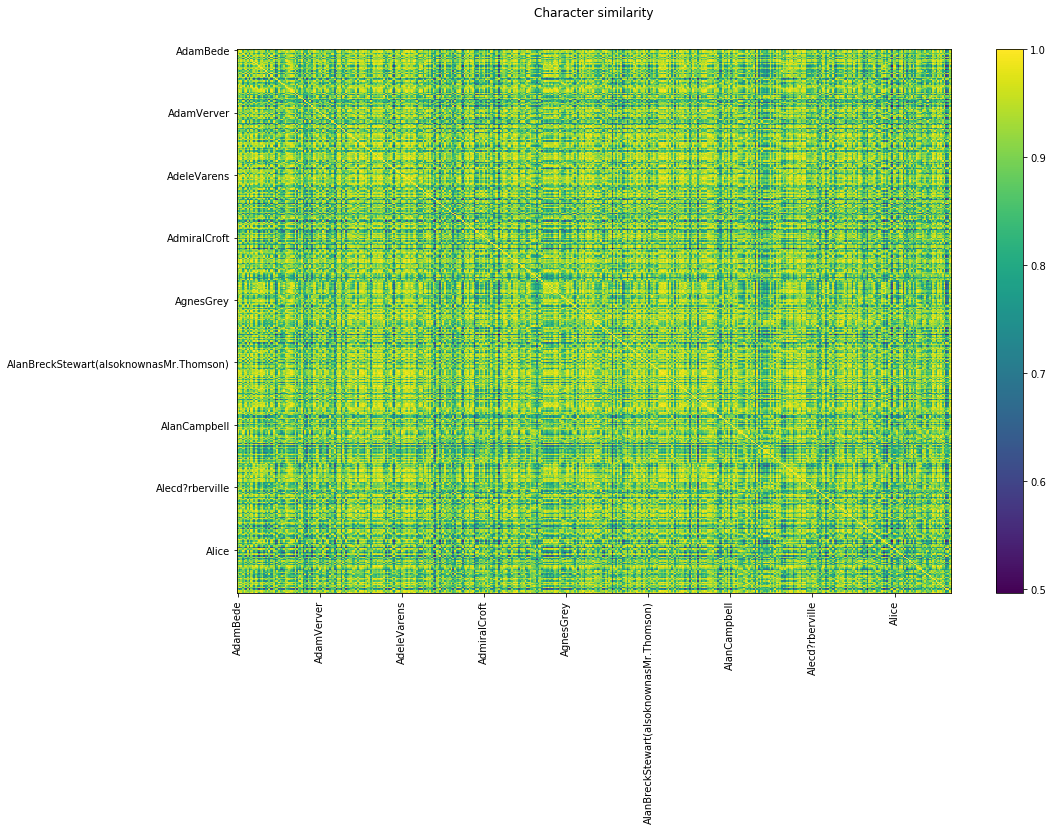

In [39]:
fig = plt.figure()
ax = plt.gca()
im = ax.matshow(S,aspect='auto')
fig.colorbar(im)
ax.set_xticklabels(charnames)
ax.set_yticklabels(charnames)
# Set ticks on both sides of axes on
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
# Rotate and align bottom ticklabels
plt.setp([tick.label1 for tick in ax.xaxis.get_major_ticks()], rotation=90,
         ha="right", va="center", rotation_mode="anchor")
ax.set_title("Character similarity")
#fig.tight_layout()
plt.show()

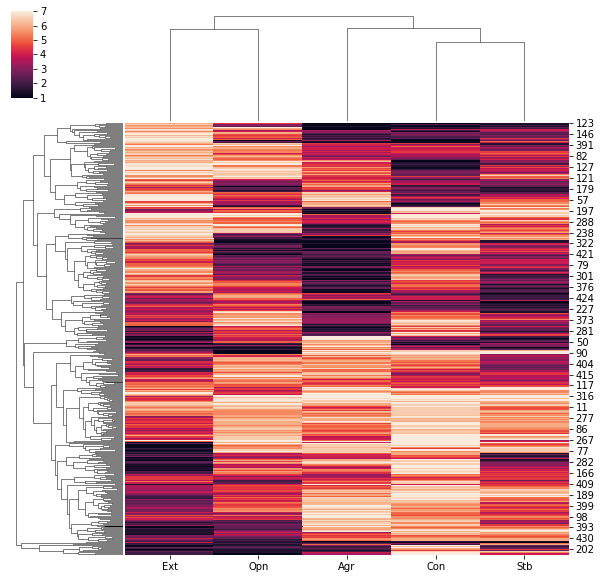

In [89]:
sns.clustermap(df[cols])
plt.show()

In [49]:
import sklearn as sk
import sklearn.cluster as skc

clust = skc.AgglomerativeClustering(n_clusters=2**4)
lbls = clust.fit(X).labels_
counts = np.bincount(lbls[lbls >= 0])
counts, len(lbls[lbls < 0])

(array([25, 23, 57, 28, 38, 23, 20, 18, 41, 32, 21,  9, 34, 24, 22, 20],
       dtype=int64), 0)

In [50]:
from sklearn.decomposition import PCA, FactorAnalysis, TruncatedSVD

pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [53]:
# (comp, feat) * (samp, feat).T = (C,F) * (F,S) = (C,S)
E = pca.components_ @ X.T

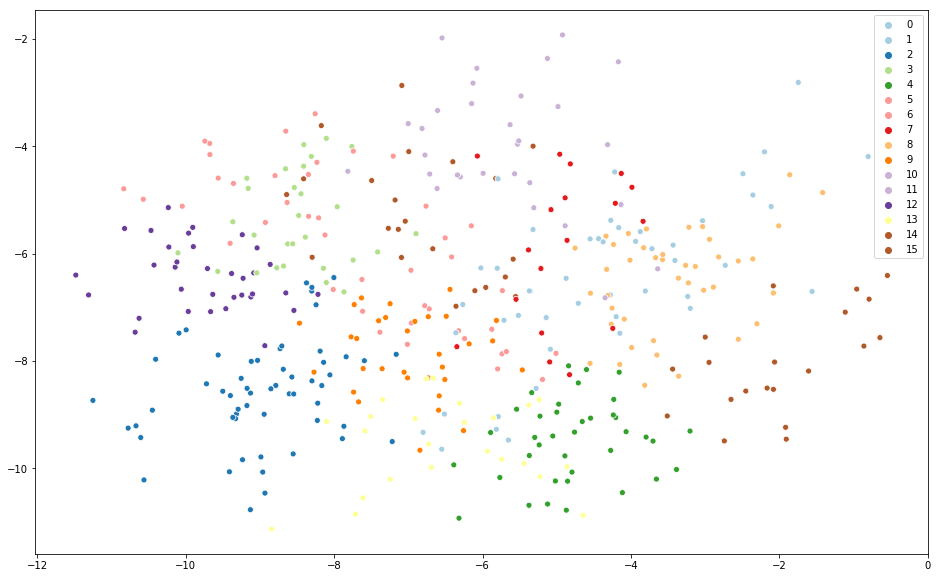

In [63]:
ax = sns.scatterplot(x=E[0,:],
                     y=E[1,:],
                     hue=lbls,
                     palette='Paired',
                     legend='full')
#for label, pos in zip(charnames, E.T):
    #ax.text(pos[0]+.02, pos[1], label)

plt.show()

In [90]:
df.Novel.fillna('-UNKOWN-').value_counts()

-UNKOWN-                 326
Emma                      12
Great Expectations        11
Pride and Prejudice       11
Bleak House               10
Persuasion                 9
David Copperfield          8
Sense and Sensibility      8
Our Mutual Friend          6
Mansfield Park             6
Northanger Abbey           5
Hard Times                 4
Little Dorrit              4
Tale of Two Cities         3
Old Curiosity Shop         3
Oliver Twist               3
Dombey and Son             2
Pickwick Papers            2
Nicholas Nickleby          1
Martin Chuzzlewit          1
Name: Novel, dtype: int64

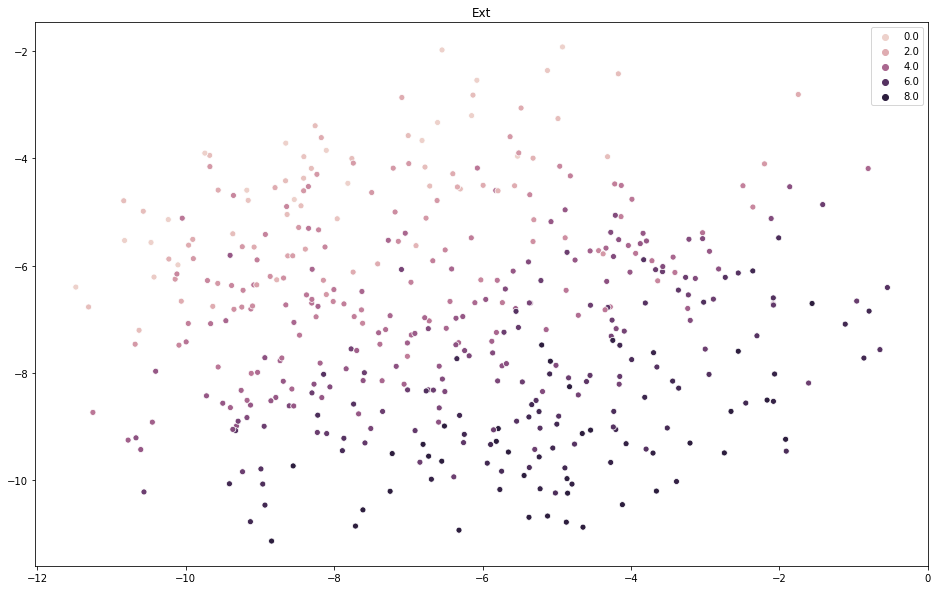

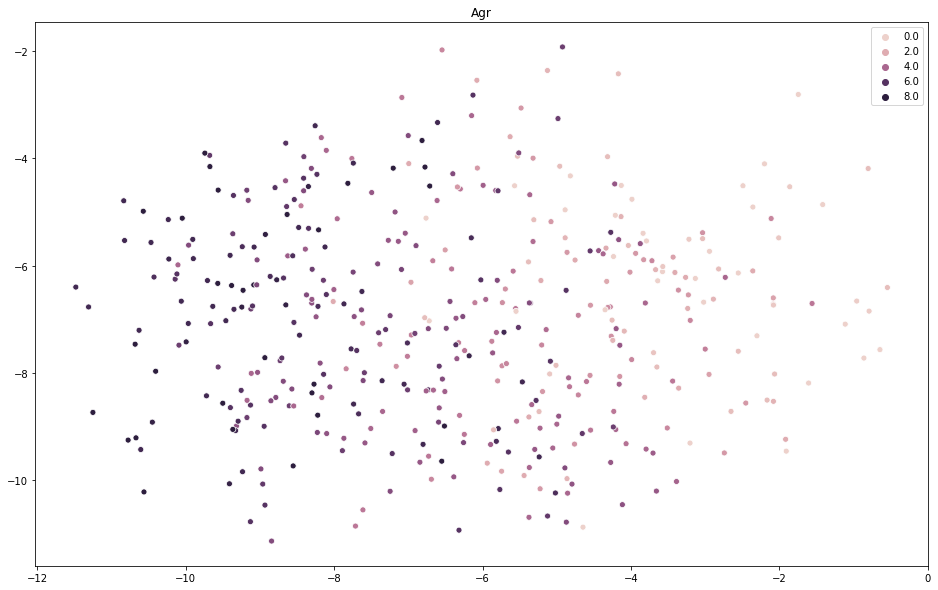

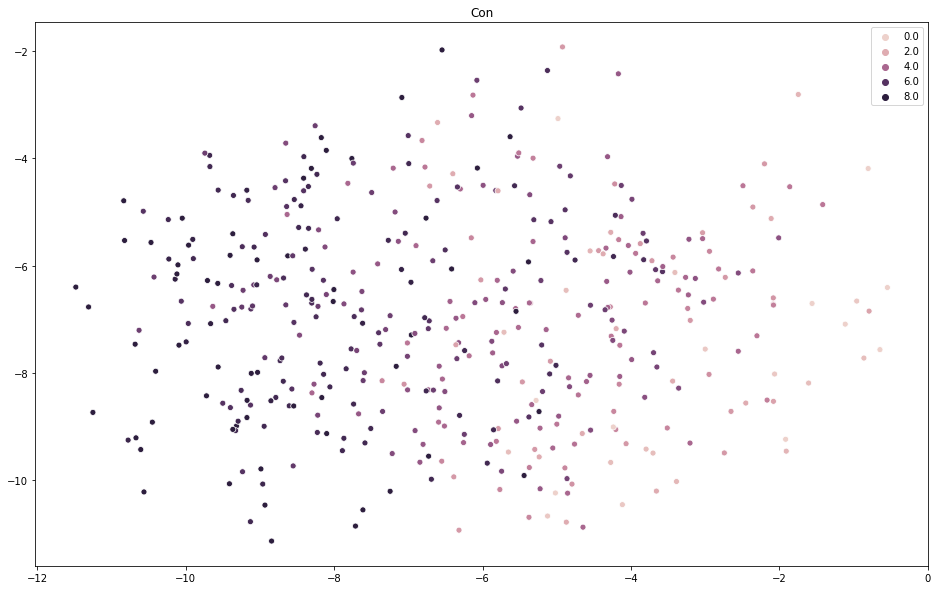

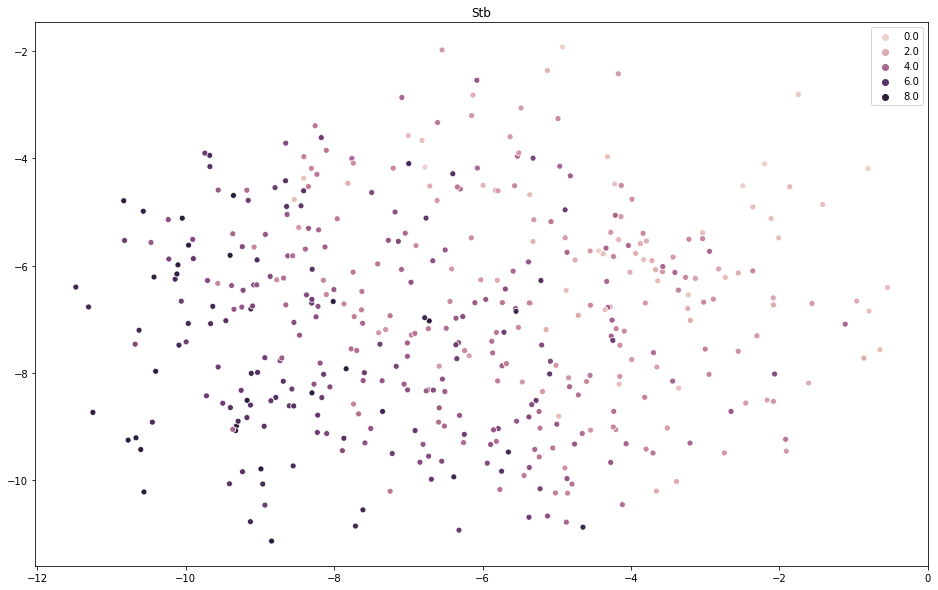

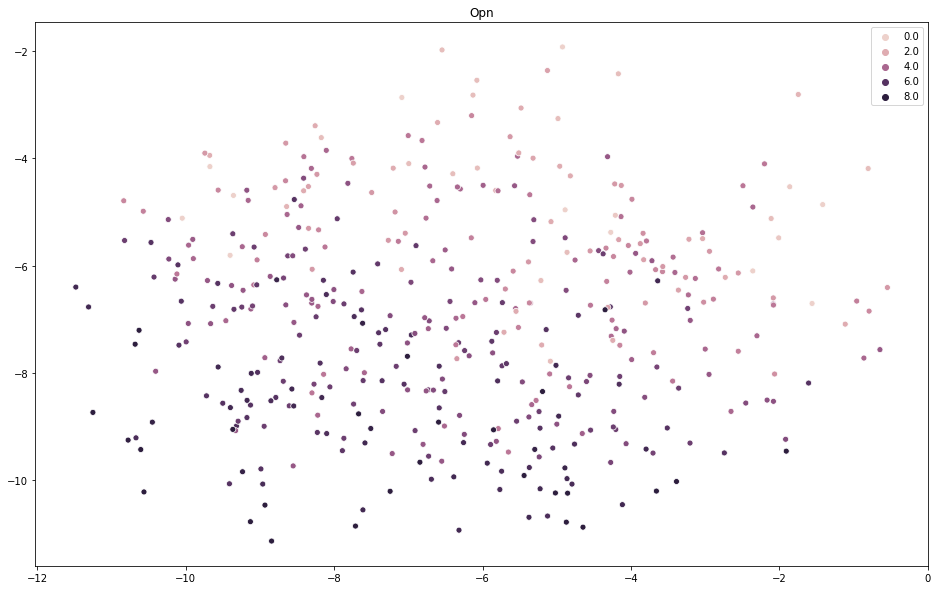

In [85]:
for t in range(X.shape[1]):
    sns.scatterplot(x=E[0,:],
                     y=E[1,:],
                     hue=X[:,t],
                    )
                         #palette='Paired',
                         #legend='full')
    #for label, pos in zip(charnames, E.T):
        #ax.text(pos[0]+.02, pos[1], label)
    plt.title(cols[t])
    plt.show()

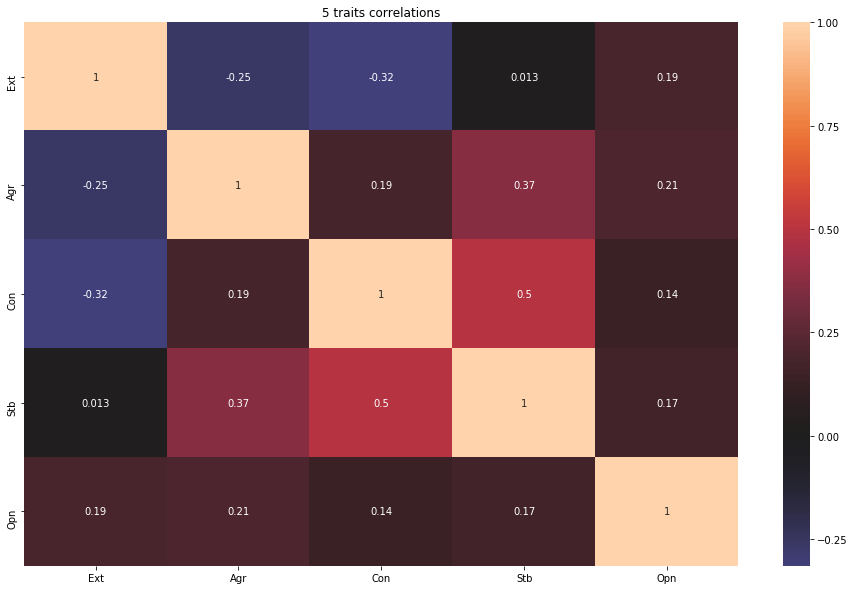

In [87]:
corrs = df[cols].corr()
sns.heatmap(corrs, center=0, annot=True, fmt='.2g')
plt.title('5 traits correlations')
plt.show()